In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('ex2data1.txt', names=('Exam1', 'Exam2', 'Admit'))

In [3]:
data

,Exam1,Exam2,Admit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [60]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

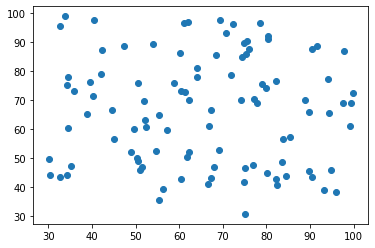

In [5]:
plt.scatter(x='Exam1', y='Exam2', data = X)

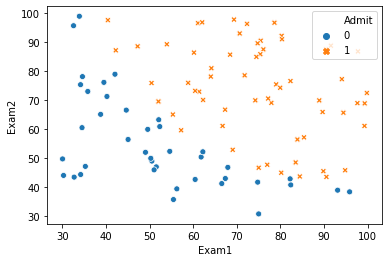

In [6]:
sns.scatterplot(data=data, x='Exam1', y='Exam2', hue='Admit', style='Admit')


# Sigmoid Function

Define sigmoid function

In [54]:
def sigmoid(z):
   s = 1/(1 + np.exp(-z))
   return s

In [8]:
sigmoid(0)

0.5

# Compute Cost Function for Logistic Regression

Define hypothesis function

In [65]:
def hypothesis(theta, X):
    return sigmoid(np.dot(X,theta))

Define Cost function

In [66]:
def costFunction(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    return (-1/m) * np.sum((y* np.log(h))+((1-y)*np.log(1-h)))

Define gradient descent function

In [79]:
def gradient(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    return 1/m*(np.dot(X.T, (h-y)))

Insert a row in front of X for the intercept coefficient

In [68]:
n = len(X.columns)

In [69]:
m = len(y)
X.insert(0, 'ones', np.ones(m))

In [70]:
X

,ones,Exam1,Exam2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376
...,...,...,...
95,1.0,83.489163,48.380286
96,1.0,42.261701,87.103851
97,1.0,99.315009,68.775409
98,1.0,55.340018,64.931938


In [71]:
initial_theta = np.zeros((n+1,1))

In [72]:
y = y[:, np.newaxis]

In [73]:
y.shape

(100, 1, 1)

In [75]:
cost= costFunction(initial_theta, X, y)

In [83]:
cost

0.693147180559946

# Parameters using fmin_tnc from scipy library

Initalize theta - one theta value for each input feature (including bias column) - set theta at all zeros

In [81]:
theta = np.zeros((X.shape[1],1))

Import the optimization function that will optimize theta - fmin_tnc from scipy library

In [84]:
from scipy.optimize import minimize, fmin_tnc

In [87]:
def fit(X,y,theta):
    opt_weights = fmin_tnc(func=costFunction, x0=theta, fprime=gradient, args=(X,y.flatten()))
    return opt_weights[0]

In [88]:
parameters=fit(X,y,theta)

In [89]:
parameters

array([-25.16131865,   0.20623159,   0.20147149])

Use optimized parameters as the theta values in the hypothesis function

In [90]:
h = hypothesis(parameters,X)

Use hypothesis to predict logistic regression outcome

In [91]:
def predict(h):
    h1 = []
    for i in h:
        if i > 0.5:
            h1.append(1)
        else:
            h1.append(0)
    return h1

y_pred = predict(h)
    

Calculate the accuracy of the model

In [94]:
accuracy = 0

for i in range(0, len(y_pred)):
    if y_pred[i] == y[i]:
        accuracy += 1
        
accuracy/len(y)

0.89